Problem Description: Predict if an individual earns more than 50K dollars per year based on demographic and employment data using supervised learning algorithms. This is a binary classification task.This kind of problem is important for people to be able to solve because understanding the relationship between education level and income categories (e.g., above or below $50,000) can provide valuable insights into socioeconomic dynamics, inequality, and the impact of education on financial well-being, informing policy decisions, career choices, and social interventions.

Data Source: Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

Data Description: This dataset consists of records detailing various socio-demographic factors such as age, education level, marital status, occupation, race, gender, and native country, each associated with an individual's income status, with the majority falling below the $50,000 threshold annually.








In [10]:
#Importing Data

import pandas as pd

column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

# Load the data
df = pd.read_csv('Desktop/Adult Income/adult.data', names=column_names)

# Display the first few rows of the DataFrame
print(df.head())

# Check for any missing values in the dataset
print(df.isnull().sum())

# Check for '?' in each column
for column in df.columns:
    missing_count = (df[column] == '?').sum()
    if missing_count > 0:
        print(f"{column}: {missing_count} missing values")

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

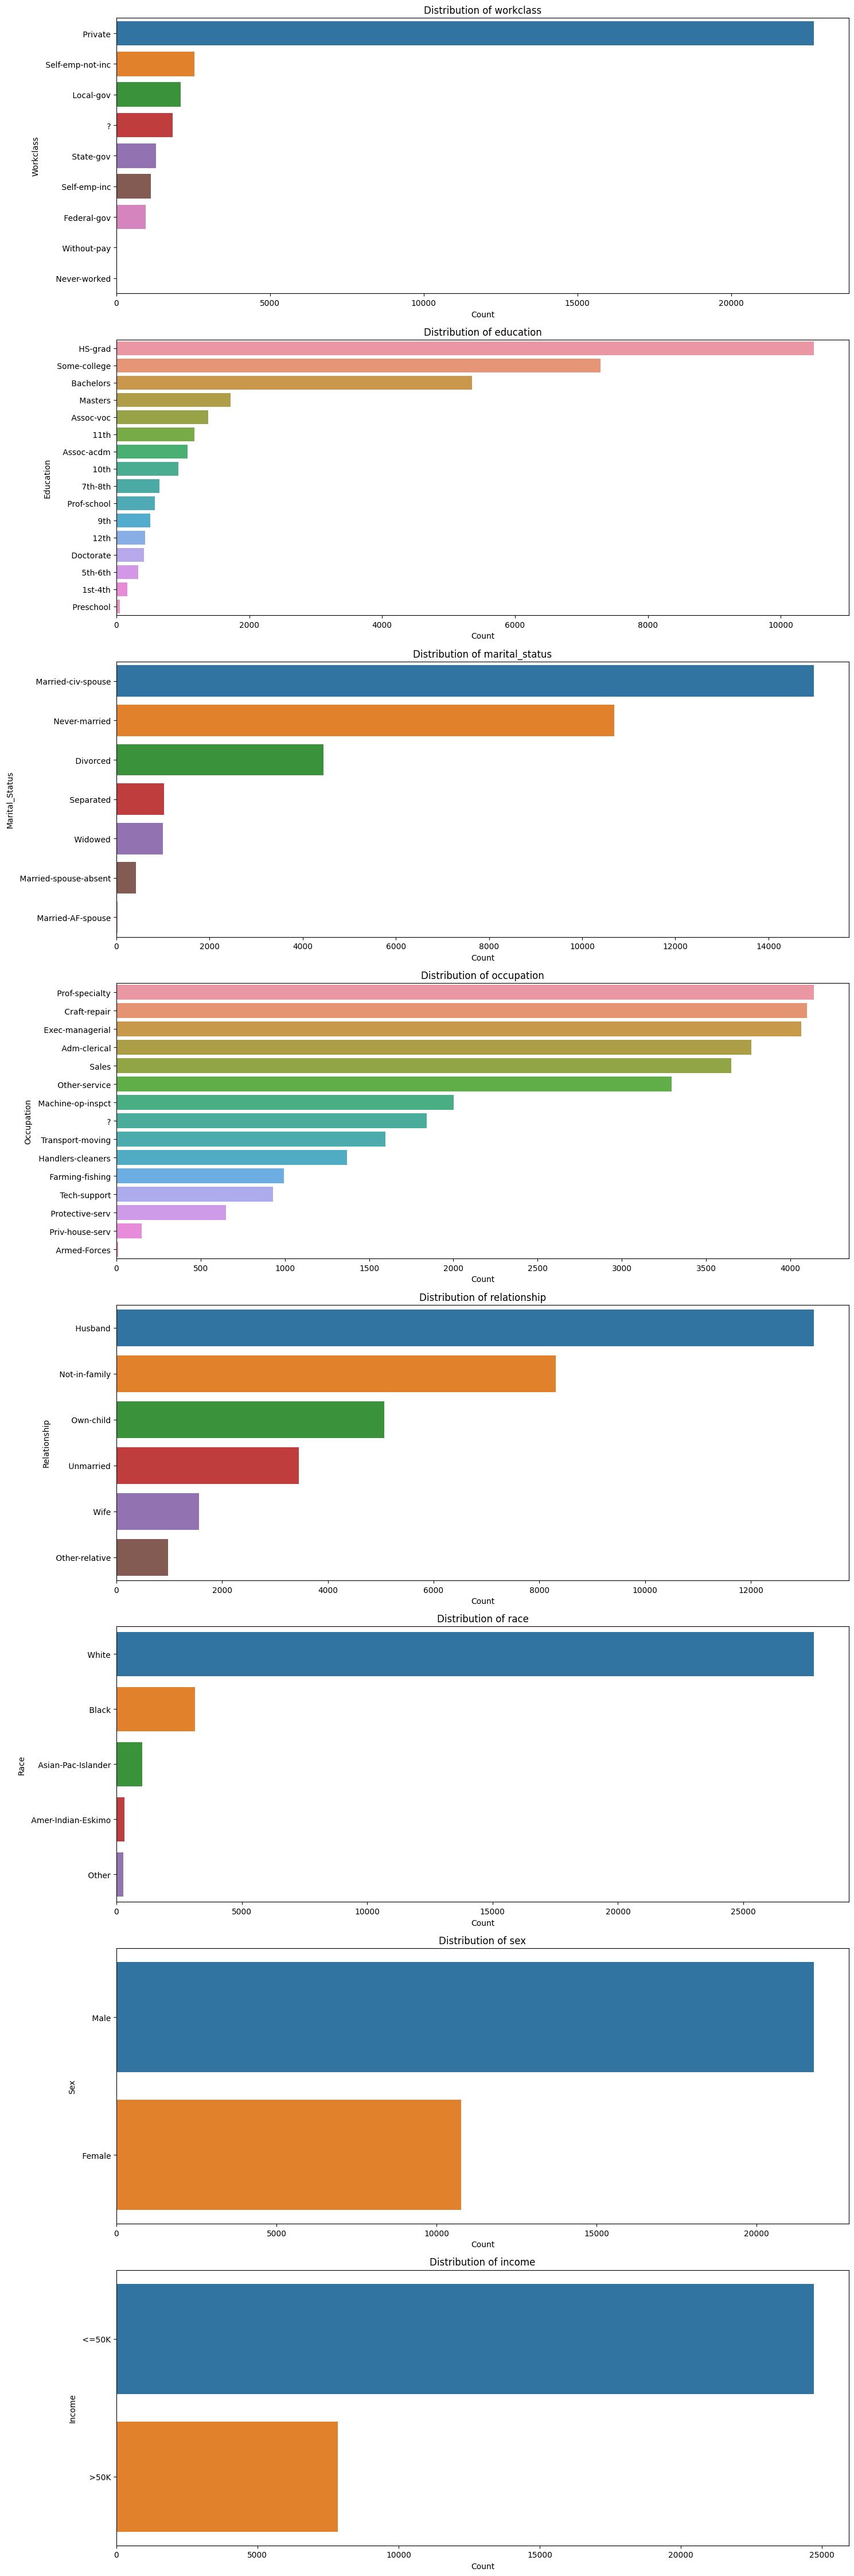

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Data Exploration and EDA:

#Univariate Analysis

# Assuming df is your DataFrame and it has been loaded correctly
categorical_vars = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'income']

# Set up the matplotlib figure
plt.figure(figsize=(15, 45))

# Create a subplot for each categorical variable
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(8, 1, i)
    sns.countplot(y=var, data=df, order=df[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xlabel('Count')
    plt.ylabel(var.title())

plt.tight_layout()
plt.show()



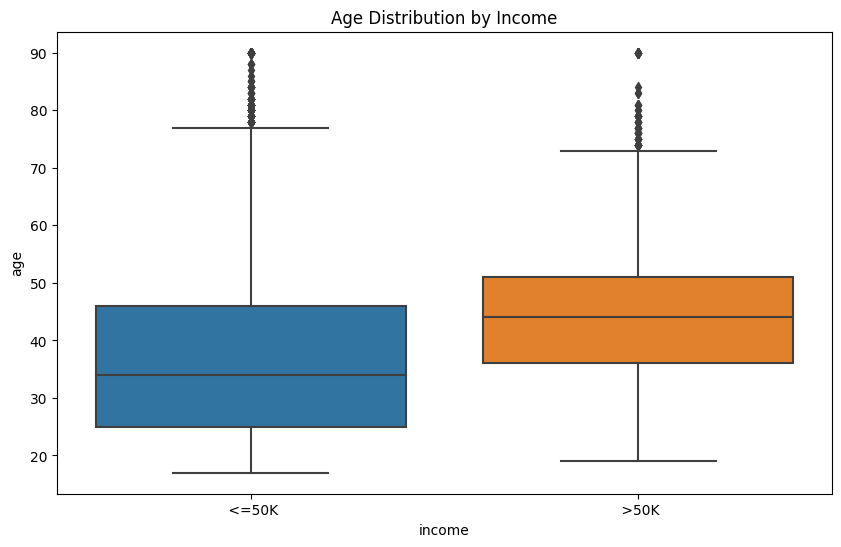

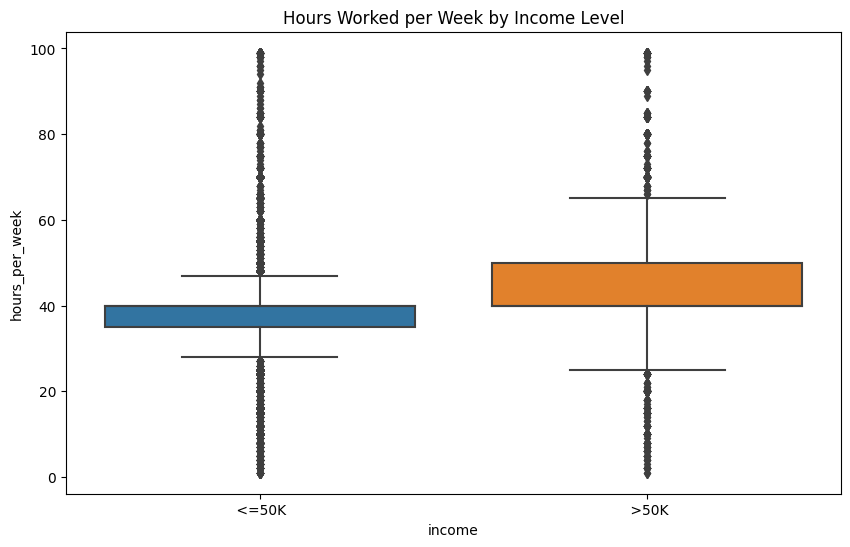

In [11]:
#Bivariate EDA


# Age distribution across income categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Age Distribution by Income')
plt.show()

# Hours per week by income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours_per_week', data=df)
plt.title('Hours Worked per Week by Income Level')
plt.show()



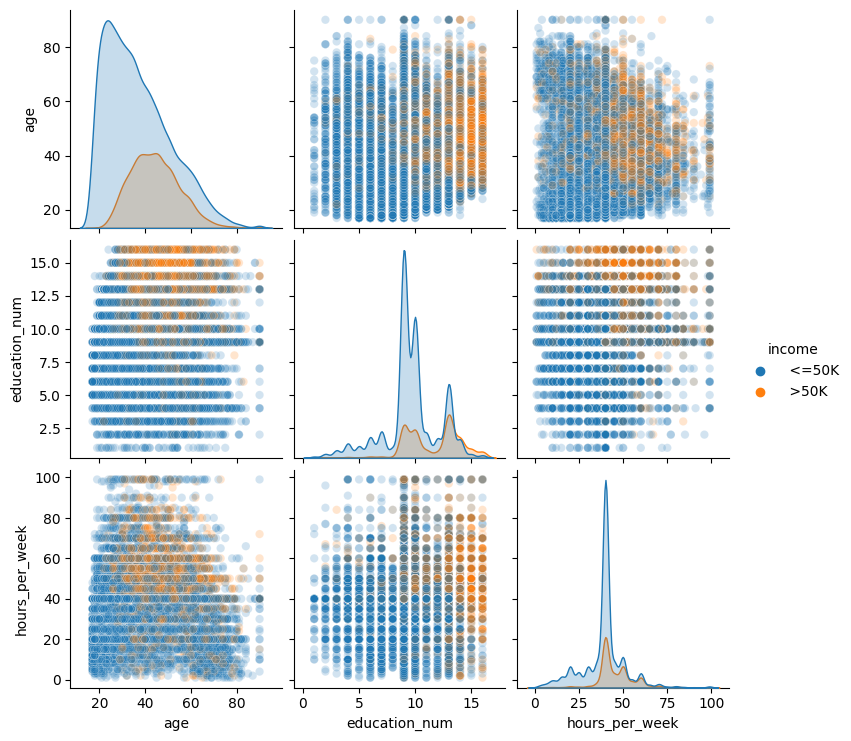

In [12]:

# Select a subset of variables for the pair plot
selected_vars = ['age', 'education_num', 'hours_per_week', 'workclass', 'occupation', 'marital_status', 'income']
# Convert categorical variables to category dtype for better handling in seaborn
for var in ['workclass', 'occupation', 'marital_status', 'income']:
    df[var] = df[var].astype('category')

# Create the pair plot
sns.pairplot(df[selected_vars], hue='income', plot_kws={'alpha': 0.2}, diag_kind='kde')
plt.show()


In [13]:
# Calculate percentage of '?' for each categorical column
for column in df.columns:
    if df[column].dtype == 'object':  # assuming all your categorical data is of object type
        missing_count = (df[column] == '?').sum()
        missing_percentage = (missing_count / len(df)) * 100
        print(f"{column}: {missing_count} missing values ({missing_percentage:.2f}%)")



education: 0 missing values (0.00%)
relationship: 0 missing values (0.00%)
race: 0 missing values (0.00%)
sex: 0 missing values (0.00%)
native_country: 0 missing values (0.00%)


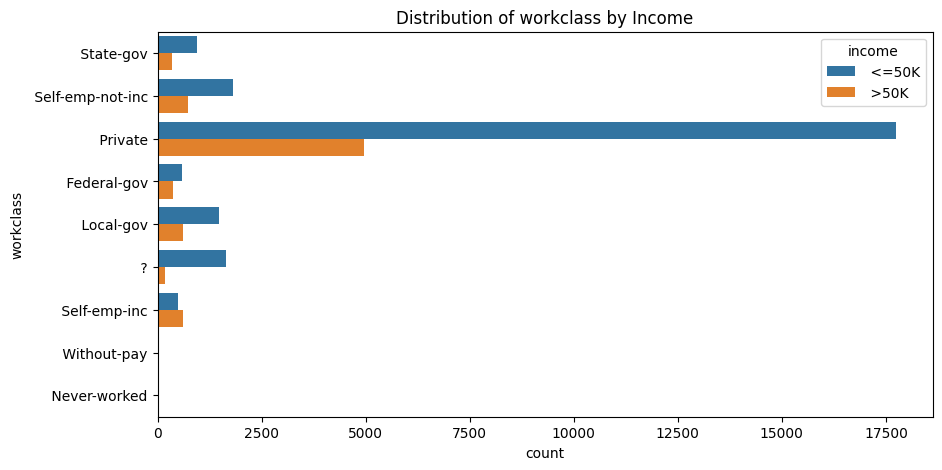

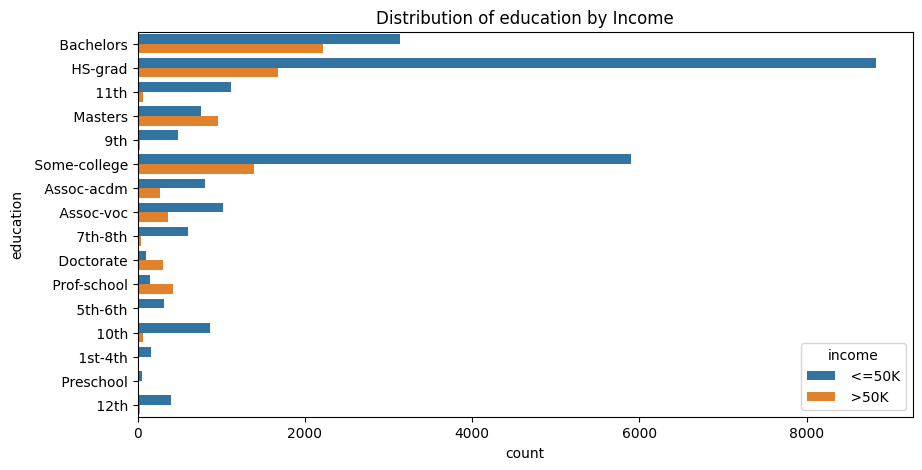

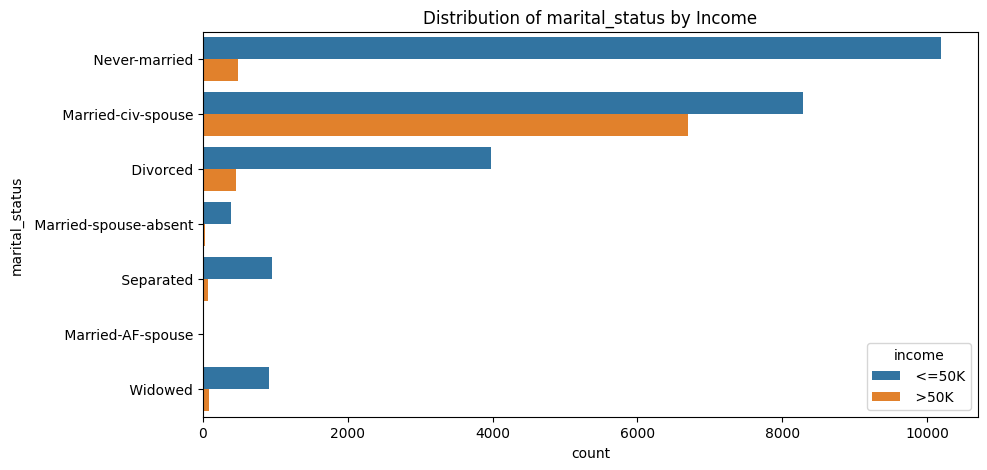

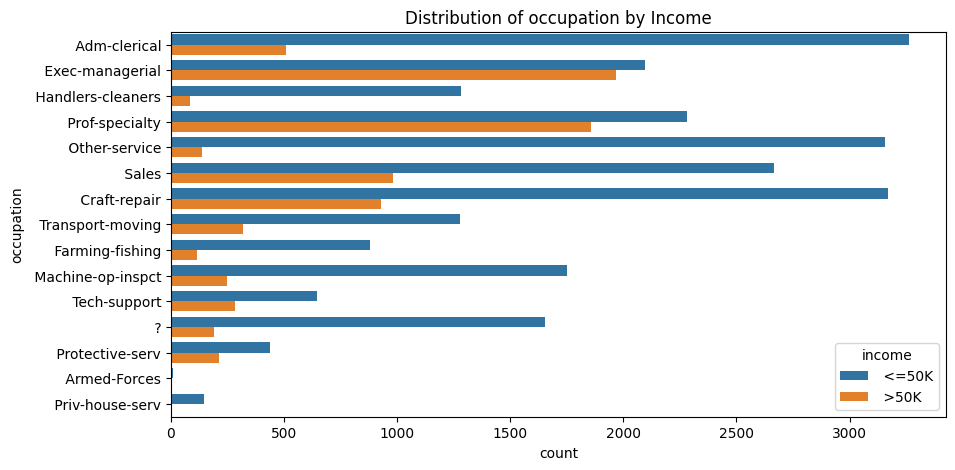

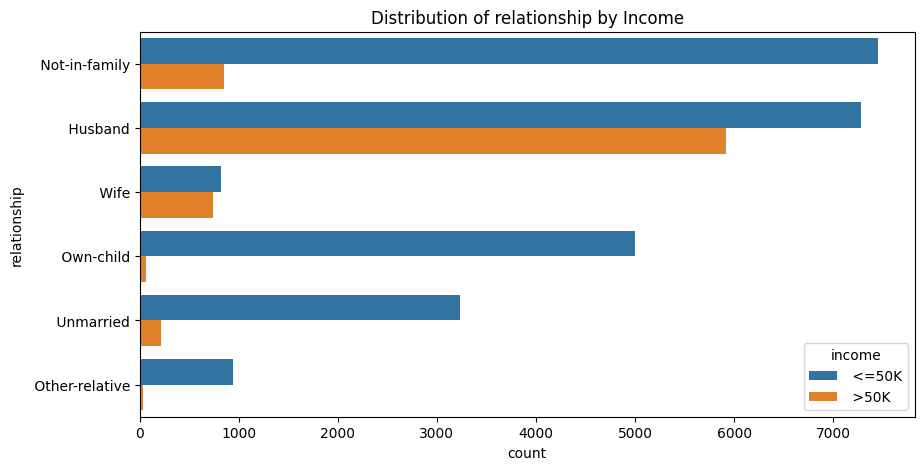

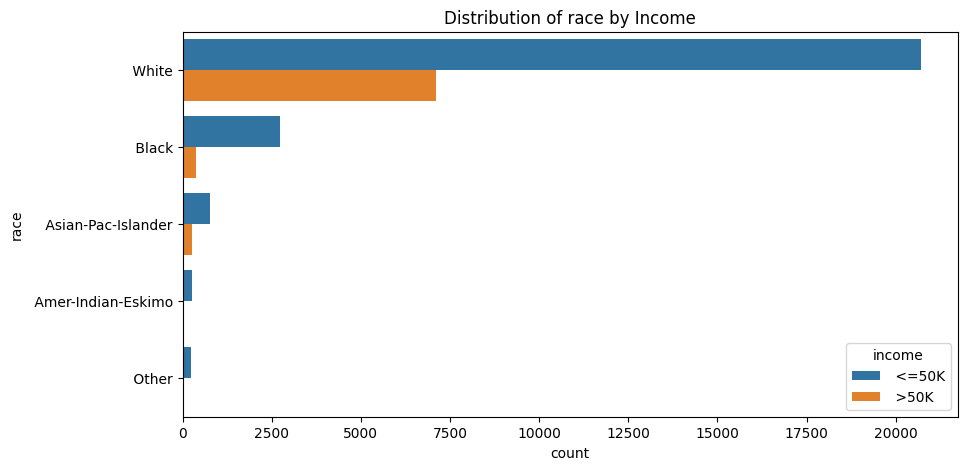

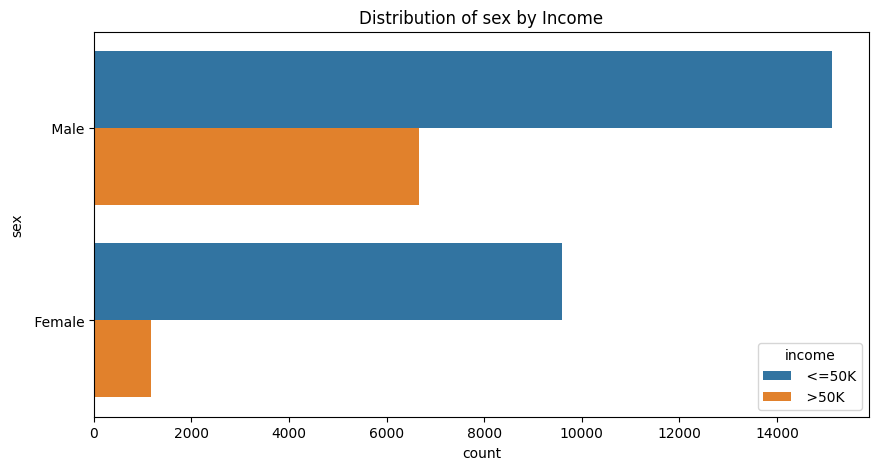

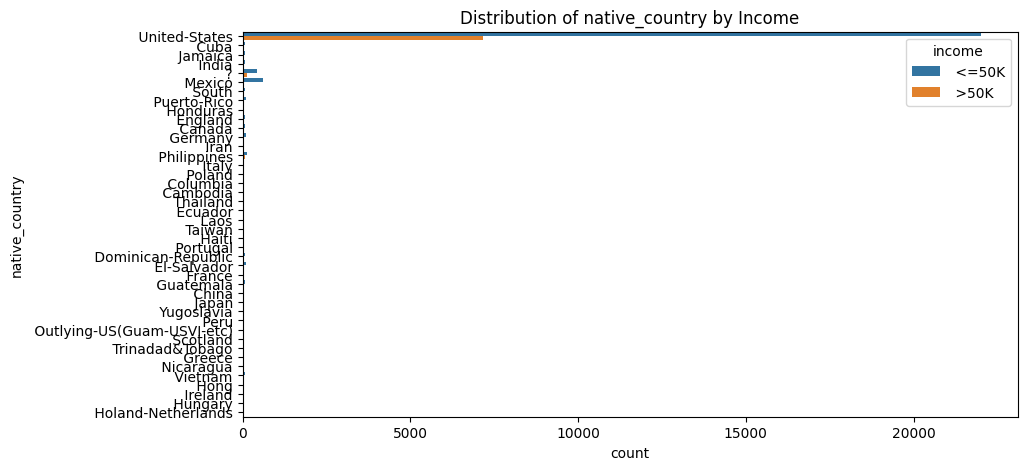

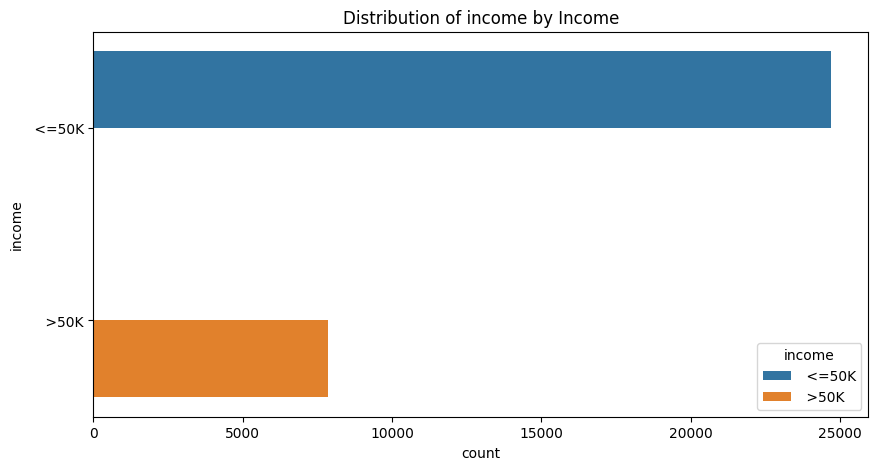

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Assuming df is your loaded DataFrame and 'income' is the target variable
X = df.drop('income', axis=1)  # Drop the target variable
y = df['income']  # Target variable

# Split the data while preserving the class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create transformers for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')# Assuming df is loaded as the DataFrame with your data
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Check how the preprocessor transforms the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ])

# Fit and transform a small subset of the data to verify the output
preprocessor.fit(X_train.head())
transformed_sample = preprocessor.transform(X_train.head())
print("Transformed sample shape:", transformed_sample.shape)


# Define the complete pipelines for each model with preprocessing
models = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier())
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier())
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(probability=True))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier())
    ]),
    'Neural Network': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', MLPClassifier(max_iter=1000))
    ])
}

# Train each model encapsulated in a pipeline
for name, pipeline in models.items():
    try:
        pipeline.fit(X_train, y_train)  # Train the model with the training data
        print(f"{name} has been successfully trained.")
    except Exception as e:
        print(f"Error training {name}: {e}")



Numeric features: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical features: ['education', 'relationship', 'race', 'sex', 'native_country']
Transformed sample shape: (5, 18)
Logistic Regression has been successfully trained.
Decision Tree has been successfully trained.
Random Forest has been successfully trained.
SVM has been successfully trained.
Gradient Boosting has been successfully trained.
Neural Network has been successfully trained.


In [17]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import numpy as np

# Define a function to evaluate all models
def evaluate_models(models, X_test, y_test):
    results = {}
    for name, pipeline in models.items():
        # Ensure we're using the pipeline object with 'named_steps'
        if isinstance(pipeline, Pipeline):
            # Manually transform the test data using the preprocessor to check if it's correctly applied
            X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)
            
            # Ensure that no categorical data remains unprocessed
            if np.issubdtype(X_test_transformed.dtype, np.number):
                # Predict the class labels for the provided data
                y_pred = pipeline.predict(X_test)
                
                # Check if the model supports probability predictions
                if hasattr(pipeline._final_estimator, "predict_proba"):
                    y_prob = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
                    roc_auc = roc_auc_score(y_test, y_prob)  # Calculate ROC-AUC score
                    results[name] = {'Accuracy': accuracy_score(y_test, y_pred),
                                     'ROC-AUC': roc_auc,
                                     'Classification Report': classification_report(y_test, y_pred)}
                    print(f"Results for {name}:")
                    print("Accuracy:", results[name]['Accuracy'])
                    print("ROC-AUC Score:", results[name]['ROC-AUC'])
                    print(results[name]['Classification Report'])
                else:
                    results[name] = {'Accuracy': accuracy_score(y_test, y_pred),
                                     'Classification Report': classification_report(y_test, y_pred)}
                    print(f"Results for {name}:")
                    print("Accuracy:", results[name]['Accuracy'])
                    print("Classification Report:")
                    print(results[name]['Classification Report'])
            else:
                print(f"Data type error in preprocessing for {name}, please check the data types and preprocessing steps.")
        else:
            print(f"Error: {name} is not a valid Pipeline object.")

        print("-" * 60)
    
    return results

# Evaluate all models
model_results = evaluate_models(models, X_test, y_test)


Results for Logistic Regression:
Accuracy: 0.8466144633809305
ROC-AUC Score: 0.8987171385237614
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4945
        >50K       0.73      0.58      0.64      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.85      0.84      6513

------------------------------------------------------------
Results for Decision Tree:
Accuracy: 0.8030093658836174
ROC-AUC Score: 0.733734149625472
              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      4945
        >50K       0.59      0.60      0.59      1568

    accuracy                           0.80      6513
   macro avg       0.73      0.73      0.73      6513
weighted avg       0.80      0.80      0.80      6513

------------------------------------------------------------
Results for Random Forest:
Accuracy: 0.

In [26]:
#Moving forward with GRadient Boosting because it had the highest accuracy and the best ROC_AUC score as well as strong precision and recall scores.



Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best parameters: {'classifier__subsample': 0.9, 'classifier__n_estimators': 300, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.01}
Best score: 0.8578009828009827


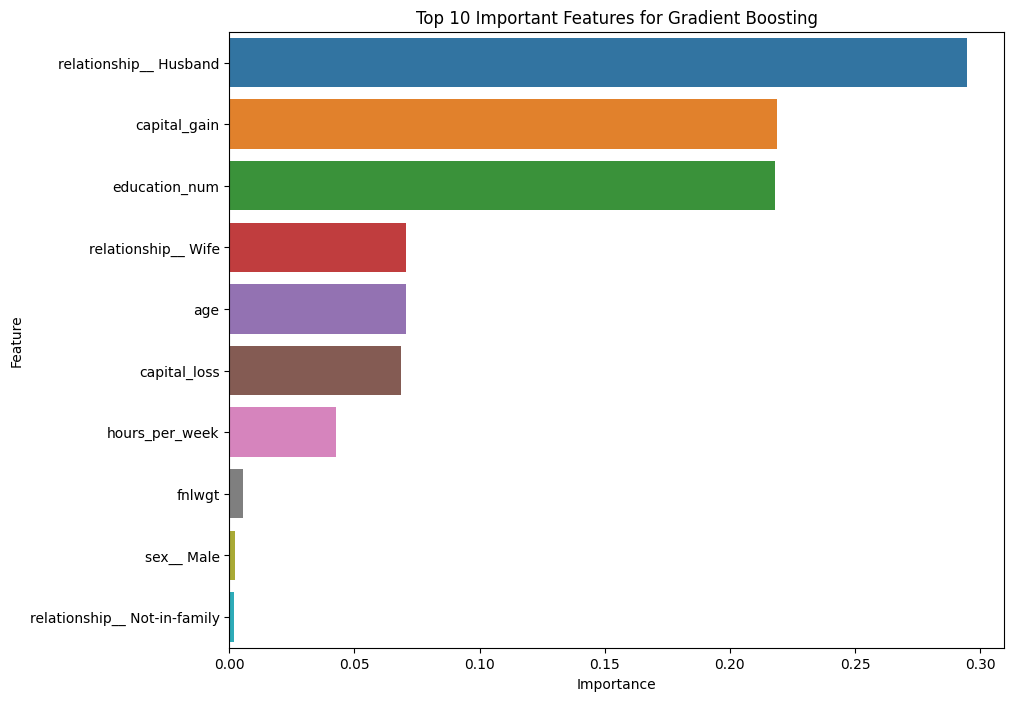

In [30]:
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Access the Gradient Boosting pipeline and classifier
gb_pipeline = models['Gradient Boosting']

# Ensuring the pipeline is fitted; if not, fit it with the training data
if not hasattr(gb_pipeline, "named_steps"):
    gb_pipeline.fit(X_train, y_train)

# Feature names extraction directly from the ColumnTransformer after it's fitted
feature_names = []
# Get the ColumnTransformer from the pipeline
preprocessor = gb_pipeline.named_steps['preprocessor']
# Retrieve transformers and check if fitted
for transformer_name, transformer, column_names in preprocessor.transformers_[:-1]:  # last one is remainder
    if hasattr(transformer, 'categories_'):
        # Handling categorical features (one-hot encoded)
        categories = transformer.categories_
        for col, cats in zip(column_names, categories):
            feature_names.extend([f"{col}__{cat}" for cat in cats])
    else:
        # Handling numeric features
        feature_names.extend(column_names)

# Extract feature importances from the model
feature_importances = gb_pipeline.named_steps['classifier'].feature_importances_

# Ensure that the feature names match the length of feature importances
if len(feature_names) != len(feature_importances):
    raise ValueError("Mismatch in the number of feature names and importances")

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Important Features for Gradient Boosting')
plt.show()


In [32]:
import pandas as pd
from sklearn.pipeline import Pipeline

# Example new data point (ensure it matches the feature structure used during training)
new_data = {
    'age': [37],
    'workclass': ['Private'],
    'fnlwgt': [215646],
    'education': ['HS-grad'],
    'education_num': [9],
    'marital_status': ['Divorced'],
    'occupation': ['Handlers-cleaners'],
    'relationship': ['Not-in-family'],
    'race': ['White'],
    'sex': ['Male'],
    'capital_gain': [0],
    'capital_loss': [0],
    'hours_per_week': [40],
    'native_country': ['United-States']
}

# Convert the dictionary to DataFrame
new_data_df = pd.DataFrame(new_data)


def make_prediction(model, data):
    # Check if the model is a properly structured pipeline
    if isinstance(model, Pipeline) and 'preprocessor' in model.named_steps and 'classifier' in model.named_steps:
        # Preprocess the data and make predictions
        predictions = model.predict(data)
        return predictions
    else:
        raise ValueError("Provided model is not a properly configured pipeline.")

# Make a prediction using the prepared function
predicted_output = make_prediction(gb_pipeline, new_data_df)
print("Predicted Output:", predicted_output)

# If the classifier can estimate probabilities and you need them
if 'predict_proba' in dir(gb_pipeline.named_steps['classifier']):
    probabilities = gb_pipeline.predict_proba(new_data_df)
    print("Probability of each class:", probabilities)


Predicted Output: [' <=50K']
Probability of each class: [[0.96726798 0.03273202]]


Project Summary: Predictive Analysis Using Gradient Boosting

Objective
The primary goal of this project was to develop a predictive model to determine if an individual earns more than $50,000 per year based on demographic and employment-related data. This type of analysis is crucial for understanding socio-economic dynamics, aiding in policy formulation, and targeting specific groups for social interventions.

Data and Preprocessing
The dataset utilized was sourced from the UCI Machine Learning Repository and included various socio-demographic factors such as age, education level, marital status, occupation, race, gender, and native country, each associated with an individual's income status.

The data preprocessing involved:

Handling Missing Values: Identified and imputed missing data to maintain the integrity of the dataset.
Feature Engineering: Transformed categorical variables using OneHotEncoder and standardized numerical variables to prepare the data for effective model training.
Splitting the Data: Divided the data into training and testing sets to ensure a robust evaluation of the model.
Model Selection and Training
Multiple models were considered, including Logistic Regression, Decision Tree, Random Forest, SVM, Gradient Boosting, and Neural Networks. Each model was encapsulated in a pipeline that included necessary preprocessing steps.

Gradient Boosting was selected as the final model due to its superior performance in preliminary assessments, which showed the highest accuracy and ROC-AUC scores along with strong precision and recall values.

Feature Importance eature importance analysis revealed that:

Marital Status and Gender: Attributes like relationship__Husband and relationship__Wife were highly influential, suggesting significant effects of familial roles and gender on income levels.
Economic Factors: Capital gain and loss were crucial indicators, reflecting the direct impact of financial status on income.
Education and Age: These factors were also predictive of income levels, aligning with traditional economic theories on labor markets.
Model Evaluation
The final model, Gradient Boosting, achieved an accuracy of approximately 86.6%, with a robust ROC-AUC score. This performance was evaluated using a range of metrics including precision, recall, and F1-score to ensure a comprehensive understanding of the model's predictive capabilities.

Conclusions and Future Work
The project successfully demonstrated the ability to use machine learning to predict income levels based on socio-demographic data. The findings underscore the importance of familial roles, education, and financial factors in determining economic outcomes.e levels.